<a href="https://colab.research.google.com/github/jesuselizondo/Actividades/blob/main/AF5_Procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **IMPORTAMOS LAS LIBRERIAS A UTILIZAR**

In [ ]:
import pandas as pd       #Para los datos
import numpy as np        #cálculos numéricos
import matplotlib.pyplot as plt  # Para gráficos

2. **EL DATA SET A UTILIZAR (robot_sensors.csv)**

In [ ]:
url = 'https://raw.githubusercontent.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/refs/heads/main/MachineLearning/Datasets/robot_sensors.csv'
df = pd.read_csv(url)

**Ejercicio 1.- Análisis y normalización de datos de sensores en un robot móvil**

In [ ]:
print(df.head(10)) #PRIMERAS 10 FILAS DE LA
print(df.shape) #TAMAñO DE LA TABLA

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246
5           5       24.039507         32.939168         31.390974
6           6       15.227525         34.613828         26.746098
7           7       87.955853         42.459783         31.650658
8           8       64.100351         12.483400         20.980492
9           9       73.726532         24.471248         27.313568
(1000, 4)


In [ ]:
print('VALORES NULOS:')
print(df.isnull().sum()) #ACCION PARA ANALIZAR VALORES NULOS EN LA TABLA

VALORES NULOS:
Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64


In [ ]:
print('ELIMINANDO VALORES NULOS')
df_clean = df.dropna() #ACCION PARA ELIMINAR VALORES NULOS EN LA TABLA

ELIMINANDO VALORES NULOS


In [ ]:
print("Valores nulos después de limpiar:")
print(df_clean.isnull().sum())

Valores nulos después de limpiar:
Tiempo (s)          0
Distancia (cm)      0
Velocidad (cm/s)    0
Temperatura (°C)    0
dtype: int64


In [ ]:
df = df[df['Velocidad (cm/s)'] >= 0] #ACCION PARA ELIMINAR VALORES NEGATIVOS EN LA TABLA
print('VALOR MINIMO DE VELOCIDAD (min >= 0):')
print(df['Velocidad (cm/s)'].min()) #MOSTRAMOS EL VALOR MINIMO DE VELOCIDAD EN LA TABLA

VALOR MINIMO DE VELOCIDAD (min >= 0):
0.16091318


In [ ]:
#Seleccionamos solo las columnas numéricas
numericas = df.select_dtypes(include=['float64', 'int64'])

#Min-Max Scaling
df_normalizado = (numericas - numericas.min()) / (numericas.max() - numericas.min())
print(df_normalizado.head(10)) #PRIMERAS 10 FILAS DE LA TABLA NORMALIZADA

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0    0.000000        0.371735          0.182609          0.262269
1    0.001001        0.950755          0.540740          0.247509
2    0.002002        0.730954          0.873049          0.908233
3    0.003003        0.596960          0.731791          0.250082
4    0.004004        0.152134          0.806411          0.272535
5    0.005005        0.152110          0.658069          0.761054
6    0.006006        0.053716          0.691690          0.450716
7    0.007007        0.865799          0.849208          0.778404
8    0.008008        0.599429          0.247391          0.065498
9    0.009009        0.706915          0.488064          0.488630


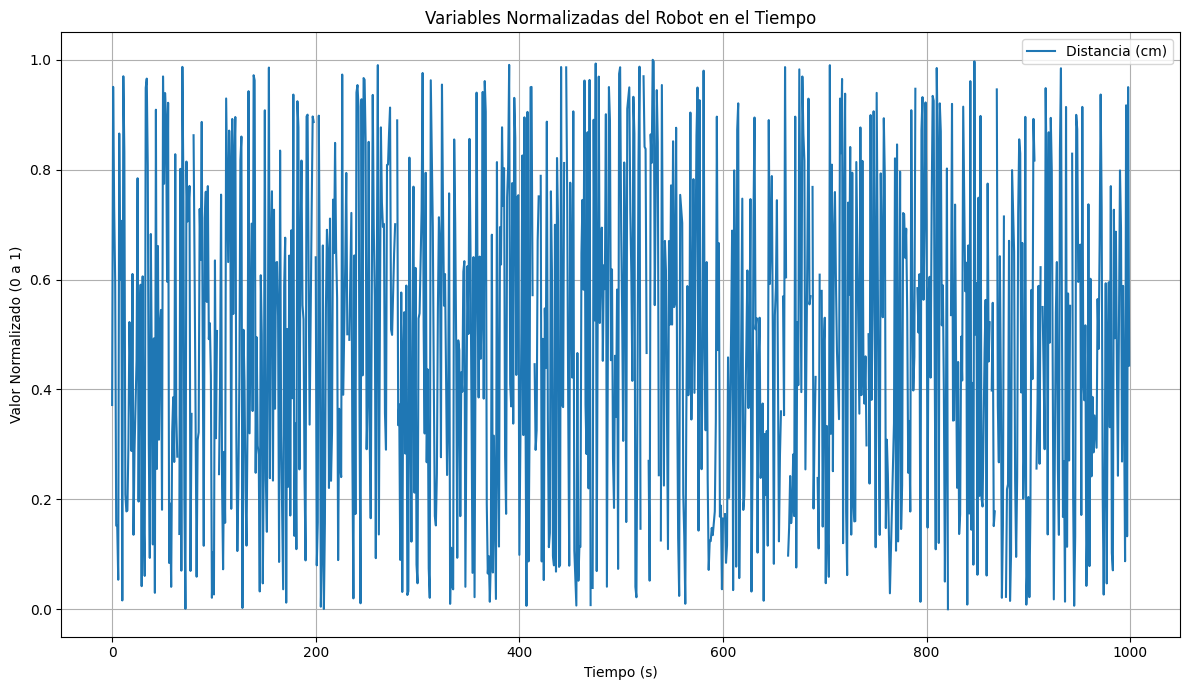

In [ ]:
plt.figure(figsize=(12, 7))
columna1 = ['Distancia (cm)']
for col1 in columna1:
    plt.plot(df['Tiempo (s)'], df_normalizado[col], label=col)

plt.title('Variables Normalizadas del Robot en el Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor Normalizado (0 a 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

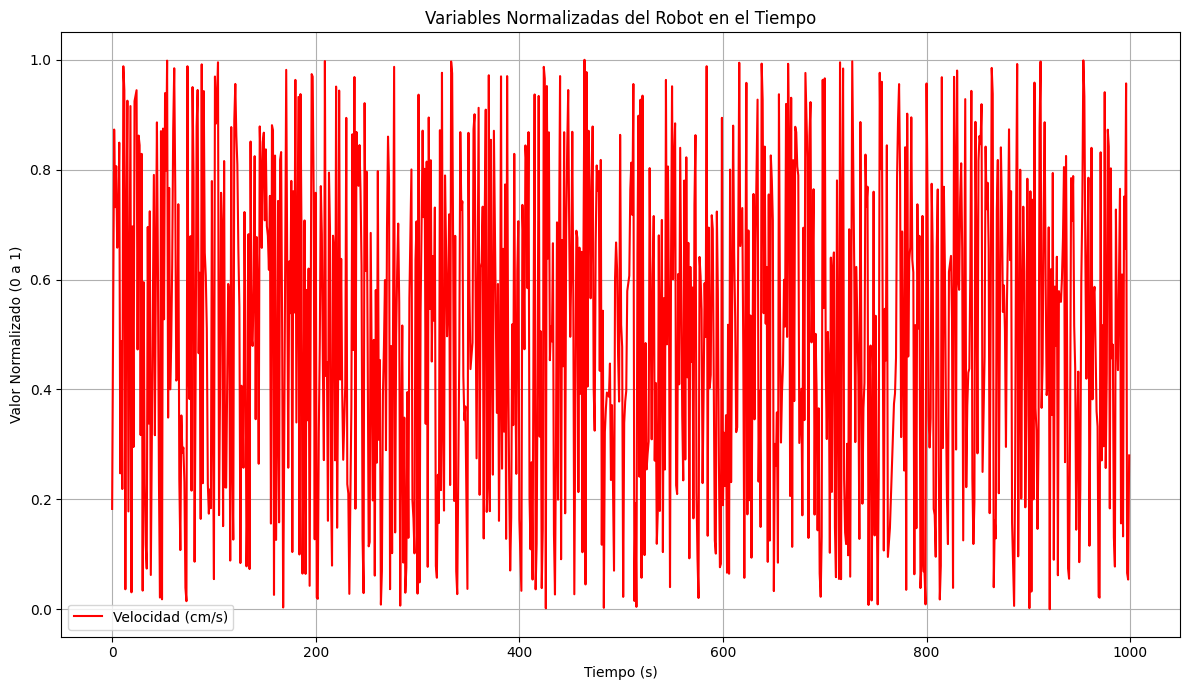

In [ ]:
plt.figure(figsize=(12, 7))
columna2 = ['Velocidad (cm/s)']
for col2 in columna2:
    plt.plot(df['Tiempo (s)'], df_normalizado[col2], label=columna2, color='red')

plt.title('Variables Normalizadas del Robot en el Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor Normalizado (0 a 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

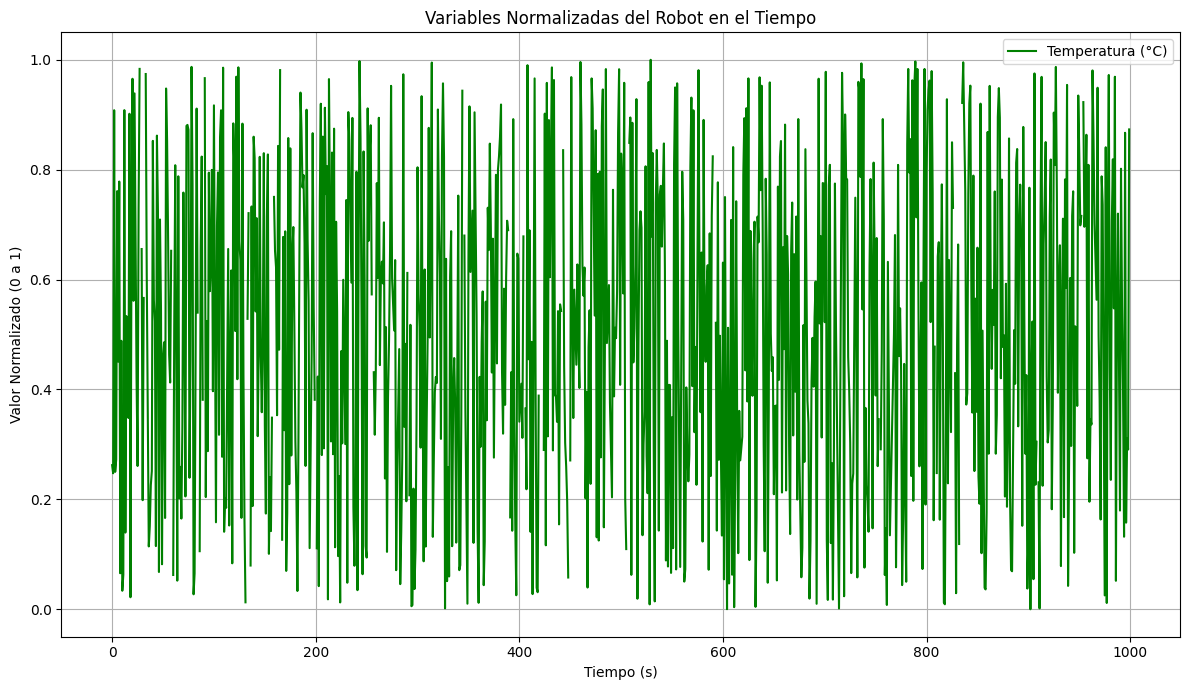

In [ ]:
plt.figure(figsize=(12, 7))
columna3 = ['Temperatura (°C)']
for col3 in columna3:
    plt.plot(df['Tiempo (s)'], df_normalizado[col3], label=columna3, color='green')

plt.title('Variables Normalizadas del Robot en el Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor Normalizado (0 a 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()